# HERA Memo #50: Delay spectra amplitudes and delays investigation
### Katherine Elder, CHAMP ASU, 08/15/18

When we made movies of the raw cross-polarized data for the entire IDR2.1 run, we noticed objects that didn't change with time. This would suggest that the sources of those objects were not part of the sky, but from the other antennas and array instrumentation. To investigate this further, we took a look at the delay spectrum. As we looked at the various plots, patterns started appearing. For instance, for many antenna pairs, the highest peak in the graph would appear at a delay time roughly corresponding to the baseline between the antenna in nanosecond. But baseline length is not the only cause of peaks. Cable reflections are a known phenomenon within the HERA array, and we were able to identify peaks which appear to correspond to the length of the cables, which are 150 meters. 

However, it was time consuming to try and examine every single antenna pair in a delay spectrum individually. The goal of this notebook is to locate the peaks in the delay spectra for each antenna pair and plot them together for ease of reading. 

## 1: Matrix Plots

Our first attempt at getting a closer look at these delay spectra peaks is to plot matricies of the antenna pairs. The color of the squares relate to either the amplitude of the maximum peak of the delay spectrum for the given antenna pair, or the corresponding delay time of the peak. 

To do this, we read in a file holding the entire run of data (created by read_all_uvfits.py) and then run through every unique antenna pair and take the delay transform. Without plotting the delay spectrum, we find the maximum amplitude (y-value) and it's corresponding delay (x-value). These numbers are placed into arrays, along with the antenna numbers, and the loop moves onto the next antenna pair. 

Once the arrays are formatted as matrix arrays, we are able to plot. The axes are the antenna numbers and the color scale is set by one of the two created matrix arrays. 

### Step 1:

Import the necessary packages and define universial constants, then read the data file into uv object. This file was created by read_all_uvfits.py using the data from the IDR2.1 LSTBIN. The data in the file has been averaged over time and any element which was flagged more than 10% of the time during the season is flagged in the combined file. 

In [1]:
#Initialize matplotlib notebook
%matplotlib notebook

#Import needed packages
from pyuvdata import UVData
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uv = UVData()

#Define constants
#The speed of light, with power adjusted for desired units
c = 0.299792
#The speed of light in a cable correction factor
f = 0.83

#Create an array of antennas we want to flag
flagged_antennas = [0,2,26,50,98,136]

#Read in the data file
uv.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/combined_files/zen.grp1.of1.yx.LST.run_8.uvOCRSL.uvfits')


Before working with the data, we will define functions to call later in the code. This helps us streamline the code and cut down on unnecessarly repeating code. The full definitions and parameters for these functions can be found in amp_delay_plotting.py.

<b>check_antnum</b> : The purpose of this function is to check to see if the user entered antenna number matches with a known antenna number. The list of available antenna are the ones that were online at the beginning of the IDR2 season and do not include antenna that came online later in the season. An error message appears if the entered antenna is flagged in the data. 

<b>find_blin_length</b> : The purpose of this function is to read in the selected reference antenna and calculate the length of each antenna pair's baseline

<b>make_max_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the absolute maximum amplitudes of the delay transform and an array of the corresponding delay times. 

<b>make_blin_depd_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the baseline dependent maximum amplitudes and an array of the corresponding delay.

<b>make_blin_ind_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the baseline independent maximum amplitudes and an array of the corresponding delays. 

<b>make_matrix_array</b> : The purpose of this function is to correctly format the arrays so that they can be used to plot the matrices. 

<b>plot_matrix_array</b> : The purpose of this function is to plot the matrix arrays for both amplitude and delay

<b>plot_position_array</b> : The purpose of this function is to plot the antenna array in their physical locations, with one plot using the amplitude as the color scale and the other plot using the delay times as the color scale. 

<b>plot_delay_position</b> : The purpose of this function is to plot the antenna array based on the distance given by the delay time

### Step 2: 

Now that all of our functions are defined, it is time to create the plots for the data. We first call our functions to create the arrays, then plot. Again, these plots contain the single maximum peak of the delay spectrum, without caring where on the spectrum the peak appeared. 

<IPython.core.display.Javascript object>


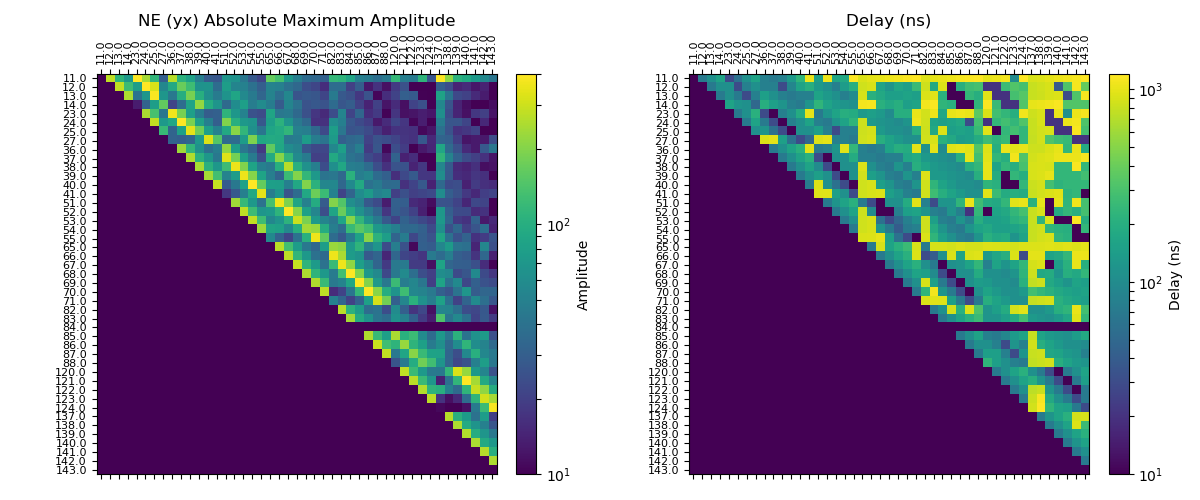

In [2]:
#Initialize the array for the amplitudes of the data and the corresponding delay
#The only required parameter is the uv object
max_amp, delay = adp.make_max_arrays(uv = uv)

#Initialize the matrix arrays of the data
#The arrays created above are passed into the function 
amp_matrix, delay_matrix = adp.make_matrix_array(amp_array = max_amp, delay_array = delay)

#Call the matrix plotting function
#The arrays created above are passed into the function
#The color scale for the first plot, which corresponds to the amplitude, is passed through vmin and vmax
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin2 and vmax2
#The title of the first plot is specified
adp.plot_matrix_array(amp_array = max_amp, amp_matrix = amp_matrix, delay_matrix = delay_matrix,
                      vmin1 = 10, vmax1 = 400,
                      vmin2 = 10, vmax2 = 1200,
                      title='NE (yx) Absolute Maximum Amplitude')

## 2: Antenna position plots

We've been able to plot matrices of the maximum amplitude, but now we want to be able to visualize where the antennas actually are in relation to each other (for instance, we could then see if the antennas next to each other are most strongly correlated, meaning they have the highest amplitudes and shortest delays). 

We will do this by first having the user enter an antenna number. This antenna will be the reference or "focus antenna" which will then be paired with every other antenna to look at the amplitudes and delays, as seen above. Essentially, we will be looking at a single row or column of the matrix plots above. 

First, we find the antenna positions and antenna numbers listed in the data. Then we prompt the user to enter an antenna number. This number is fed into a check function and then the arrays are created. Once the arrays are created and formatted, we are able to plot. 

In [11]:
#Read in the position and antenna numbers for all antennas
antpos, ants = uv.get_ENU_antpos()

#Ask the user to input the desired antenna
focus_ant = input("Which antenna would you like to look at? Enter here: ")
#Take the input and represent as an integer
focus_ant = int(focus_ant)
#Run a check that the number is valid
focus_ant = adp.check_antnum(antnum = focus_ant,ants = ants)

Which antenna would you like to look at? Enter here: 55


<IPython.core.display.Javascript object>


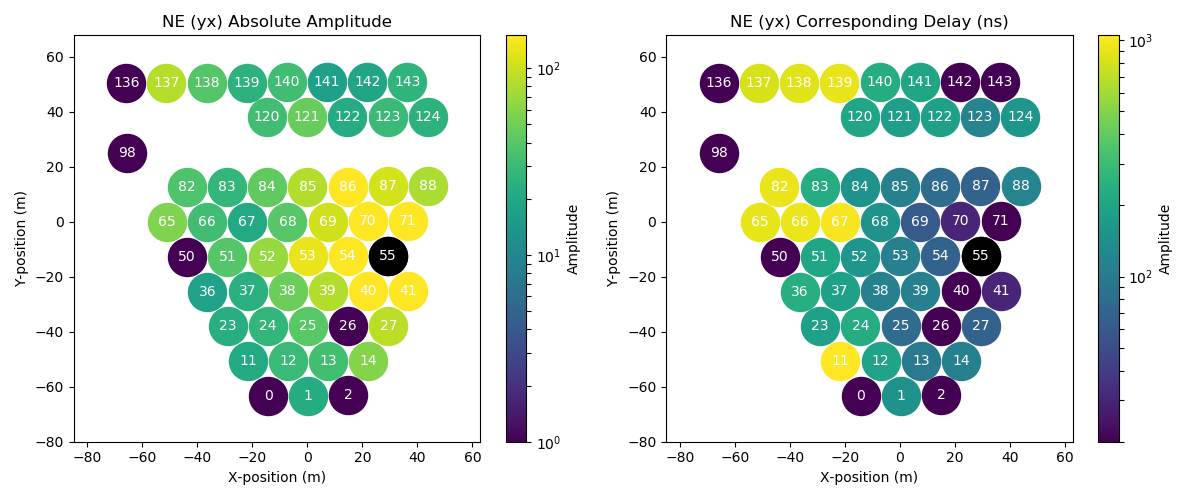

In [12]:
#Call make_array functions for the data

#Create the arrays for the max amplitude and corresponding delay for the data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp, full_ant_delay = adp.make_max_arrays(uv = uv, keep_flags = True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
all_ants_amp, all_ants_delay, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp, 
                                                                      delay_array = full_ant_delay, 
                                                                      antnum = focus_ant, index = True)

#Call the position plotting function for the data
#The arrays created above are passed into the function
#The index and delay index values are passed
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = all_ants_amp, delay_array = all_ants_delay,
                        index = index, dindex = dindex, uv = uv, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 150,
                        vmin2 = 20, vmax2 = 1050,
                        title1 = 'NE (yx) Absolute Amplitude',
                        title2 = 'NE (yx) Corresponding Delay (ns)')


## 3: Delay position plots

Plotting the antennas in their physical positions has allowed us to pick up on many patterns in the amplitude related to baseline length. But the corresponding delays are still causing some confusion and it is a little more difficult to identify what is going on in that. 

To better examine what is happening within the delays, we make plots which have the delay in meters as a function of baseline length. This allows us to see how far the signal for a given baseline had to travel before appearing in the data. 

To convert the delay (which is given in nanoseconds) into meters, we multiply by the speed of light. However, we also suspect that some of these delays are caused by the signal being reflected within the cables, and light travels more slowly in coaxial cables than in air. To see if cable reflection is playing a role in the delay spectra peaks, we create a separate array of delays in meters which is also multiplied by a correction factor to account for the reduced speed of light. 

<IPython.core.display.Javascript object>


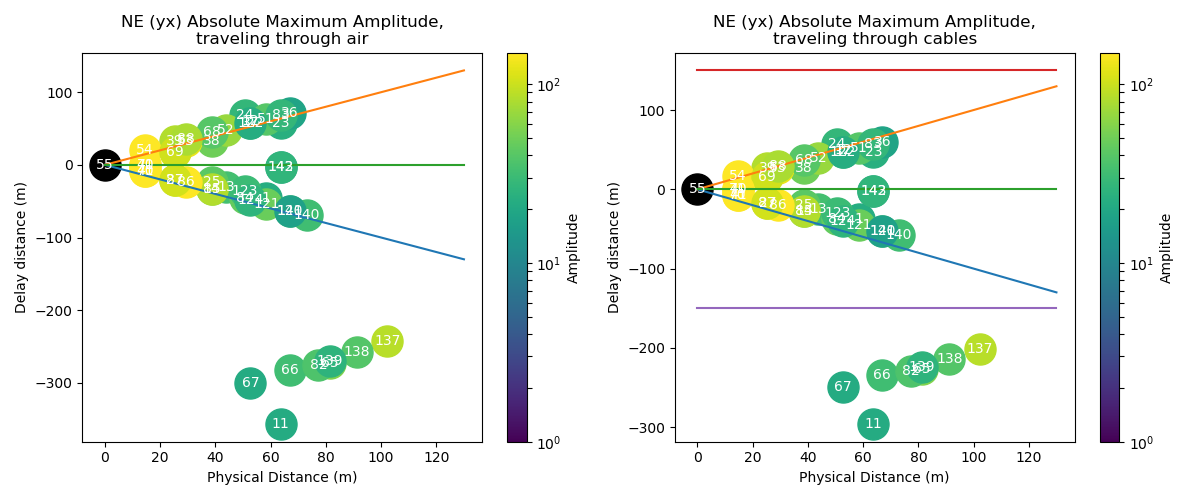

In [13]:
#Create an array which holds the delay times in meters
delay_distance = all_ants_delay * c

#Create an array which holds the delay times in meters, with the cable correction factor
dd_cable = all_ants_delay * c * f


#Call the delay position plotting function for the data

#The arrays created above are passed into the function along with the amplitude array
#The index values for both plots are passed, as well as the uv object and the entered antenna number
#The color scale for both plot are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = all_ants_amp, delay_dis_1 = delay_distance,
                        amp_2 = all_ants_amp, delay_dis_2 = dd_cable,
                        index1 = index, index2 = index, uv = uv, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 150, 
                        vmin2 = 1, vmax2 = 150,
                        title1 = 'NE (yx) Absolute Maximum Amplitude,\ntraveling through air',
                        title2 = 'NE (yx) Absolute Maximum Amplitude,\ntraveling through cables')


## 4: Baseline Dependent and Independent plots

The plots we have been making have been based on the absolute maximum values in the delay spectrum, but this means that we are losing some of the information in the plots. For instance, on short baselines, the baseline dependent peak dominates and we can't see any of the peaks relating to cables or other sources. 

To account for this, we split up the window of where we are looking for maximum amplitudes. We already identified that the baseline shows up in the delay spectrum, so one part will be focused on the length of the given baseline. The second part will look at everything outside of the baseline dependent portion of the delay spectrum. 

### Step 1: Baseline Dependent Plots

First, we will look at the baseline dependent amplitudes. These are the maximum amplitudes that fall within the distance of baseline. The longest baseline is ~120 m, so we narrow our window to only find amplitudes within approximately 120 m on either side of the chosen antenna. After the arrays are created and formatted, we are able to plot. 

<IPython.core.display.Javascript object>


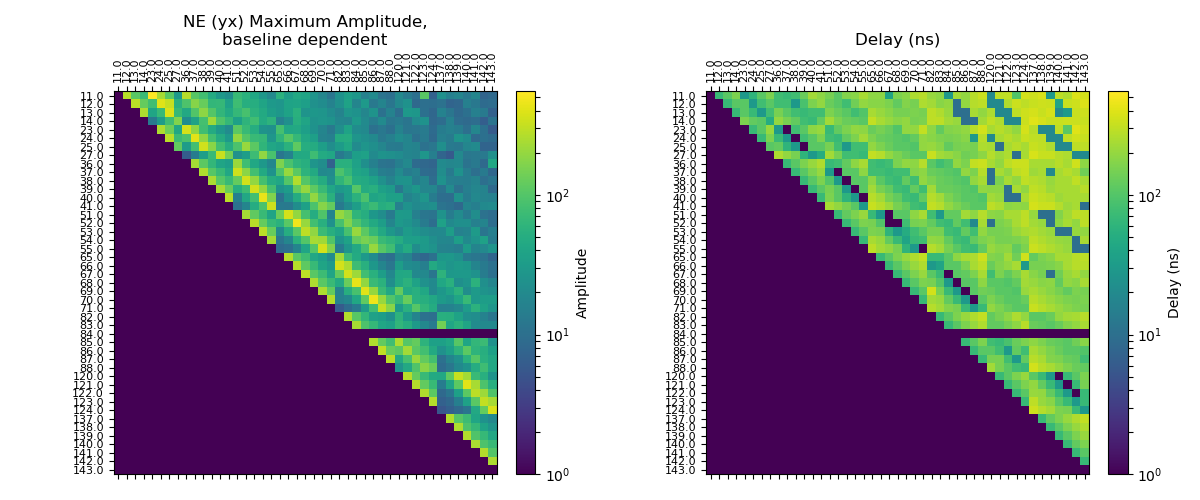

In [14]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes

#Create the arrays for the max amplitude and corresponding delay for the data
#The only parameter passed is the uv object
blin_amp, blin_delay = adp.make_blin_depd_arrays(uv = uv)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
blin_amp_matrix, blin_delay_matrix = adp.make_matrix_array(amp_array = blin_amp, 
                                                                 delay_array = blin_delay)

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the first plot is specified
adp.plot_matrix_array(amp_array = blin_amp, amp_matrix = blin_amp_matrix, delay_matrix = blin_delay_matrix,
                      vmin1 = 1, vmax1 = 550, vmin2 = 1, vmax2 = 550,
                      title = 'NE (yx) Maximum Amplitude,\nbaseline dependent')

Now that we have printed the matrix plots, we want to look at the antenna positions as we did above. This allows us to more easily see how the physical distance between antennas affects the amplitude and delay. 

<IPython.core.display.Javascript object>


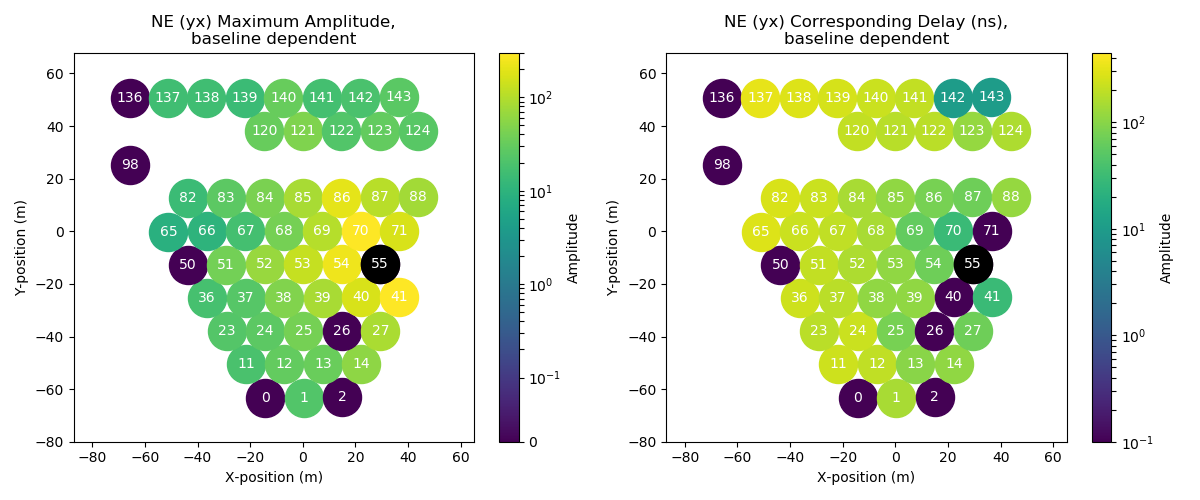

In [15]:
#Create the arrays for the maximum values and the matrix, then plot

#Create the arrays for the max amplitude and corresponding delay for the data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp, full_ant_delay = adp.make_blin_depd_arrays(uv = uv, keep_flags = True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp, blin_ants_delay, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp, 
                                                                            delay_array = full_ant_delay, 
                                                                            antnum = focus_ant, index = True)
#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp, delay_array = blin_ants_delay, 
                        index = index, dindex = dindex, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 300, 
                        vmin2 = 0.1, vmax2 = 450, 
                        title1 = 'NE (yx) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'NE (yx) Corresponding Delay (ns),\nbaseline dependent')

### Step 2: Baseline Independent plots

We've been able to isolate the amplitudes that are baseline dependent, now it's time to look at everything else. We repeat the same plots as above, but this time we use windows on either side of the baseline dependent delays to see the amplitudes. 

<IPython.core.display.Javascript object>


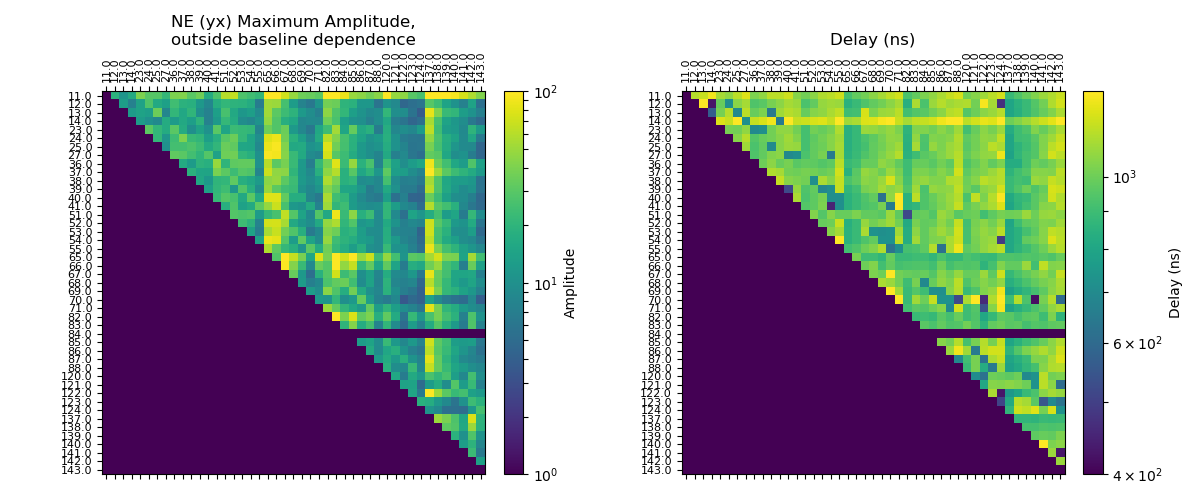

In [16]:
#Initialize the arrays for the baseline independent amplitudes of the data and the corresponding delay
#The only parameter passed is the uv object
ind_amp, ind_delay = adp.make_blin_ind_arrays(uv = uv)

#Initialize the matrix arrays of the data
#The arrays created above are passed into the function 
ind_amp_matrix, ind_delay_matrix = adp.make_matrix_array(amp_array = ind_amp, delay_array = ind_delay)

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the first plot is specified
adp.plot_matrix_array(amp_array = ind_amp, amp_matrix = ind_amp_matrix, delay_matrix = ind_delay_matrix,
                      vmin1 = 1, vmax1 = 100,
                      vmin2 = 400, vmax2 = 1300,
                      title = 'NE (yx) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


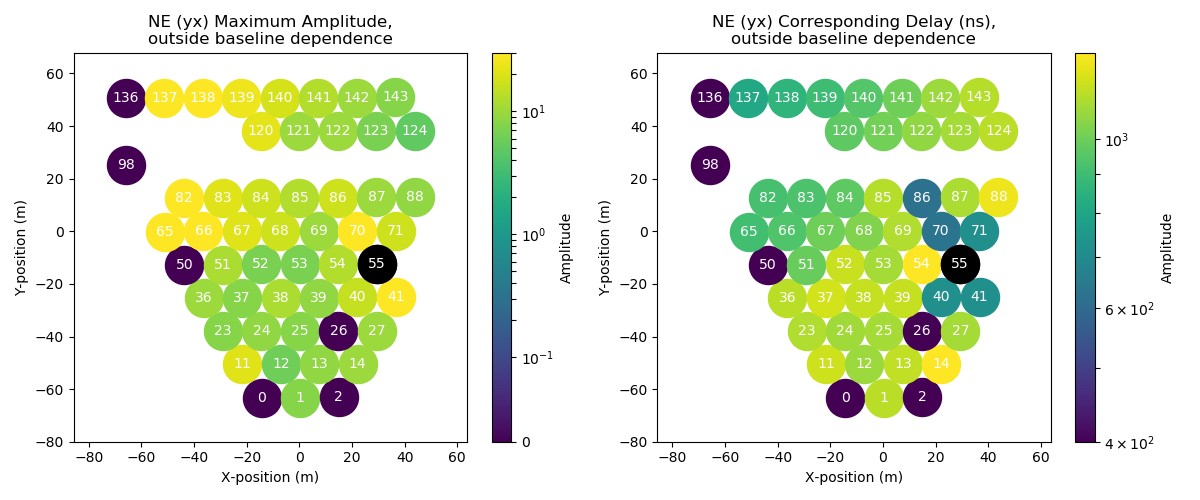

In [17]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp, full_ant_ind_delay = adp.make_blin_ind_arrays(uv = uv, keep_flags=True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp, ind_ants_delay, index_ind, dindex_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp, 
                                                                                  delay_array = full_ant_ind_delay, 
                                                                                  antnum = focus_ant, 
                                                                                  index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp, delay_array = ind_ants_delay,
                        index = index_ind, dindex = dindex_ind, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1300, 
                        title1 = 'NE (yx) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'NE (yx) Corresponding Delay (ns),\noutside baseline dependence')

### Step 3: Delay Distance Plots

Now we have been able to create and plot arrays for baseline dependent and independent amplitudes. We plot the delay distance as a function of baseline for both dependencies side by side to compare the results. 

<IPython.core.display.Javascript object>


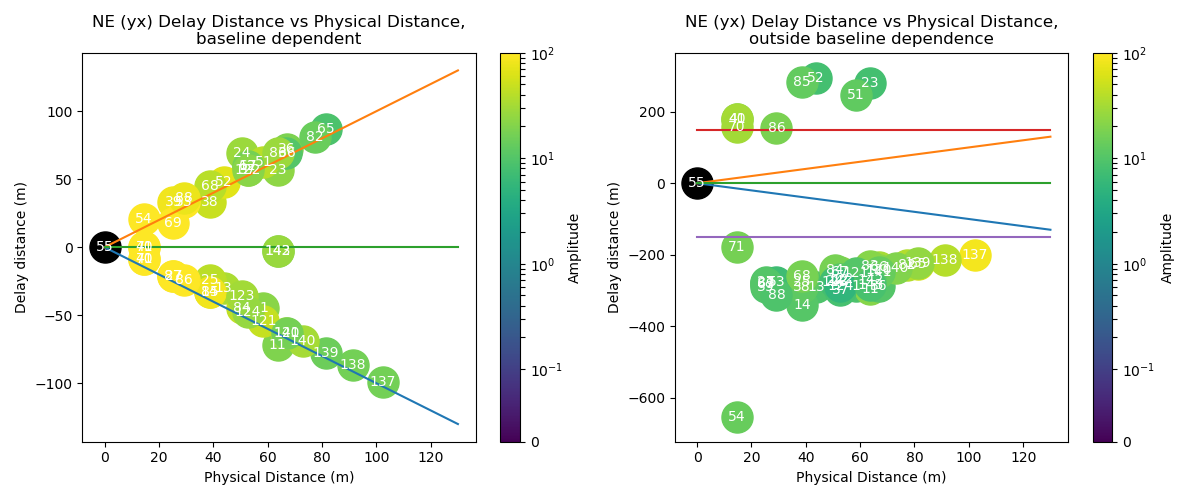

In [18]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance = blin_ants_delay * c
#Create an array which holds the baseline independent delay times in meters
ind_delay_distance = ind_ants_delay * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp, delay_dis_1 = blin_delay_distance,
                        amp_2 = ind_ants_amp, delay_dis_2 = ind_delay_distance,
                        index1 = index, index2 = index_ind, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 100, 
                        vmin2 = 0, vmax2 = 100,
                        title1 = 'NE (yx) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'NE (yx) Delay Distance vs Physical Distance,\noutside baseline dependence')

## 5: Future work

-  These plots have allowed us to get a better idea of what factors are involved in these constant offset. The next step is to build a time-averaged visibility model of the delay spectrum. 
    -  We will want to build the model with a baseline component and a non-baseline component, possibly relating to the length of cables
-  Narrow the windows so that we are being more precise when looking at baseline lengths
    -  Currently, the functions are looking within a window the size of the longest possible baseline, not at the actual baseline of the given antenna pair. This means that we may be overlooking peaks in the baseline independent plots, and we may be picking up outliers in the baseline dependent portion. 